In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import hdbscan
from sklearn.cluster import DBSCAN
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

### 1) Load the data sets.


In [2]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

In [3]:
flame.head()

,x,y,label
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


In [4]:
flame.label.value_counts()

2    153
1     87
Name: label, dtype: int64

In [5]:
agg.label.value_counts()

4    273
2    170
6    130
3    102
1     45
7     34
5     34
Name: label, dtype: int64

In [6]:
comp.label.value_counts()

5    158
2     92
1     50
4     45
3     38
6     16
Name: label, dtype: int64

In [7]:
jain.label.value_counts()

1    276
2     97
Name: label, dtype: int64

In [8]:
path.label.value_counts()

1    110
2     97
3     93
Name: label, dtype: int64

In [9]:
r15.label.value_counts()

15    40
14    40
13    40
12    40
11    40
10    40
9     40
8     40
7     40
6     40
5     40
4     40
3     40
2     40
1     40
Name: label, dtype: int64

In [10]:
spiral.label.value_counts()

3    106
2    105
1    101
Name: label, dtype: int64

---

### 2) Plot each of the data sets with colored true labels.



In [11]:
# Plotting function.
def plot_clusters(df, title):
    fig, ax = plt.subplots(figsize=(5,5))
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))
    
    for label, color in zip(df.label.unique(), colors):
        X = df[df.label == label]
        ax.scatter(X.iloc[:,0], X.iloc[:,1], s=70, 
                   color=color, label=label, alpha=0.9)
        
    ax.set_title(title, fontsize=20)
    ax.legend(loc='lower right')
    
    plt.show()

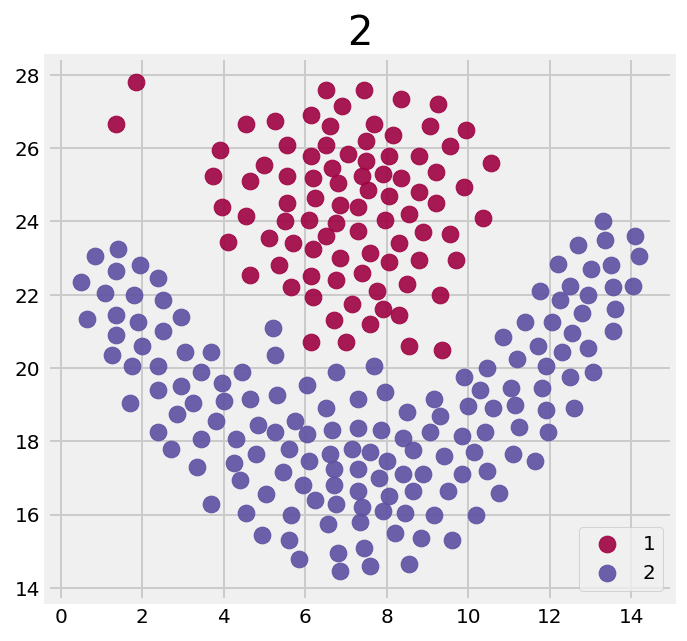

In [12]:
# Plot each data set with the true cluster labels.
plot_clusters(flame,2)

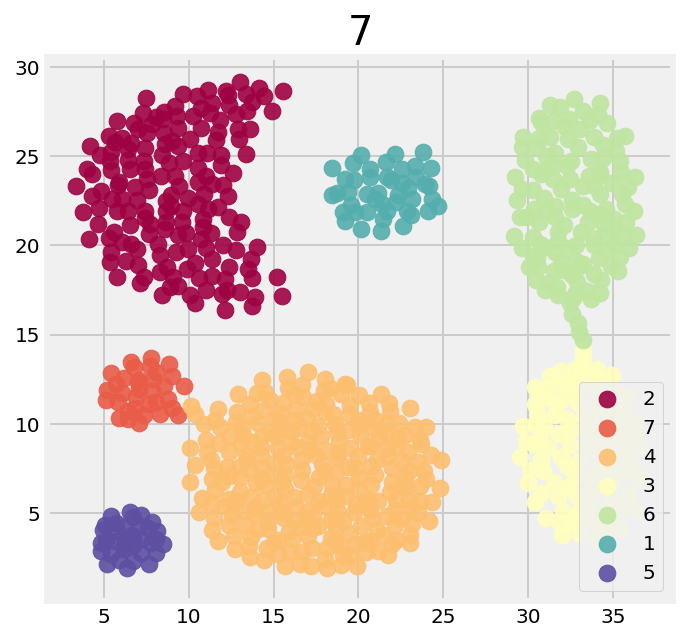

In [13]:
plot_clusters(agg,7)

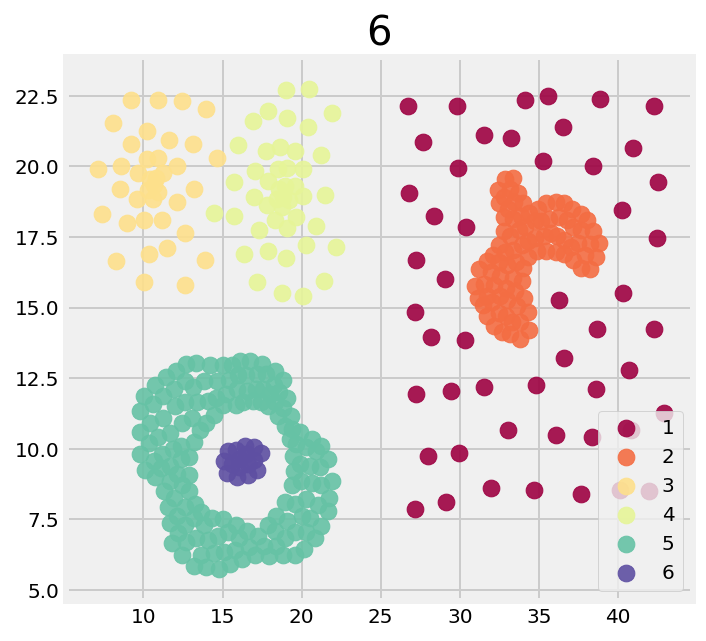

In [14]:
plot_clusters(comp,6)

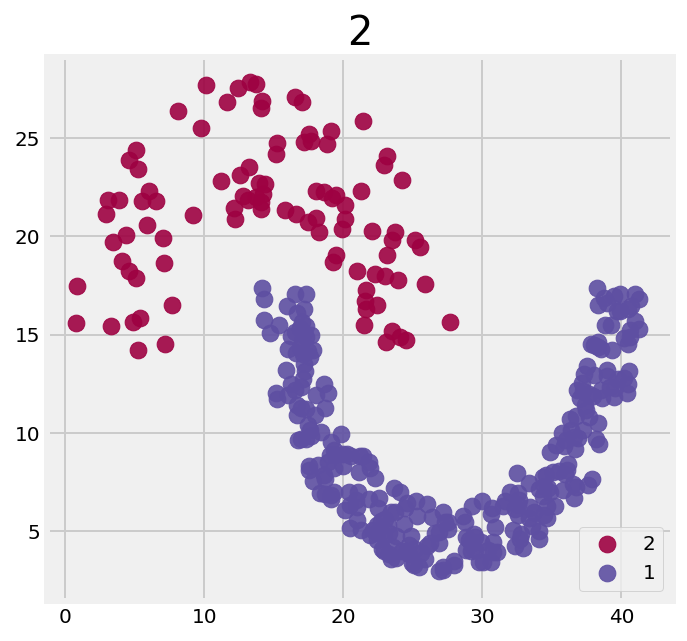

In [15]:
plot_clusters(jain,2)

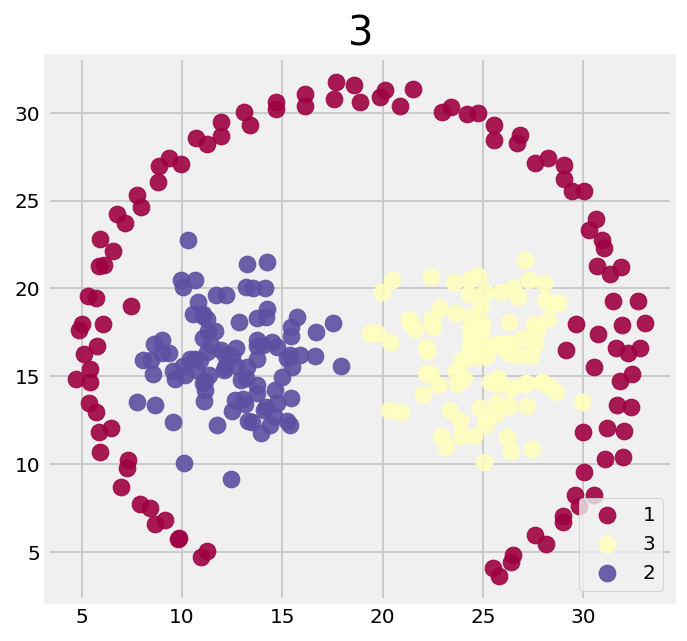

In [16]:
plot_clusters(path,3)

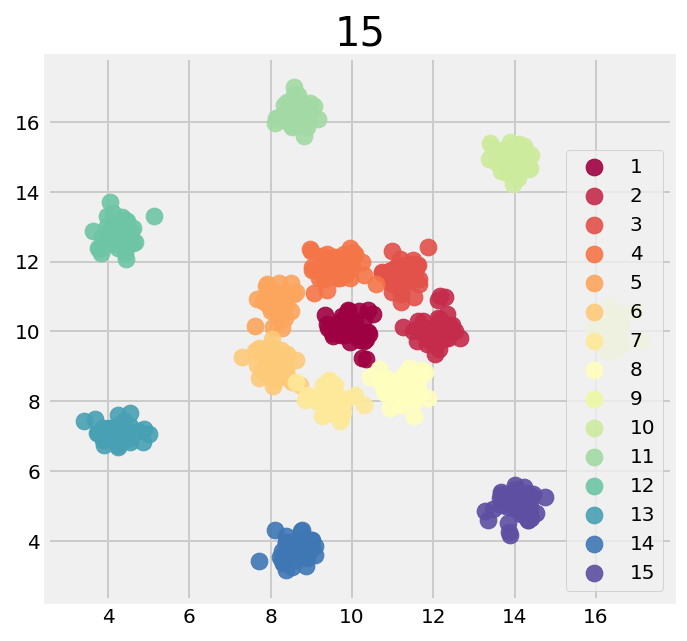

In [17]:
plot_clusters(r15,15)

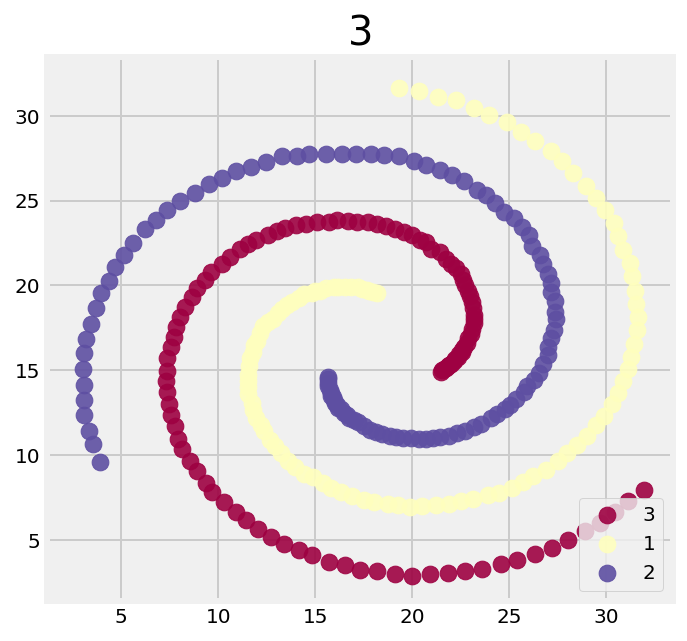

In [18]:
plot_clusters(spiral,3)

In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [21]:
def plotting(df, title, n_clusters_kmeans=3, n_clusters_agg=3,
                         dbscan_eps=3, dbscan_min_samples=5):
    
    fig, axarr = plt.subplots(1,4, figsize=(24,7))
    
    # True:
    colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))
    
    for label, color in zip(df.label.unique(), colors):
        X_ = df[df.label == label]
        axarr[0].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[0].set_title(title+' '+'true', fontsize=20)
    axarr[0].legend(loc='lower right')
    
    # Set up x.
    X = df.iloc[:, 0:2]
    
    # K-means:
    kmeans = KMeans(n_clusters=n_clusters_kmeans)
    kmeans.fit(X.iloc[:, 0:2])
    
    X['kmeans_label'] = kmeans.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.kmeans_label.unique())))
    
    for label, color in zip(X.kmeans_label.unique(), colors):
        X_ = X[X.kmeans_label == label]
        axarr[1].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[1].set_title(title+' '+'kmeans', fontsize=20)
    axarr[1].legend(loc='lower right')
    
    
    # Hierarchical/agglomerative:
    aggclust = AgglomerativeClustering(n_clusters=n_clusters_agg)
    aggclust.fit(X.iloc[:, 0:2])
    
    X['aggclust_label'] = aggclust.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.aggclust_label.unique())))
    
    for label, color in zip(X.aggclust_label.unique(), colors):
        X_ = X[X.aggclust_label == label]
        axarr[2].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[2].set_title(title+' '+'agglomerative', fontsize=20)
    axarr[2].legend(loc='lower right')
    
    
    # DBSCAN:
    dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
    dbscan.fit(X.iloc[:, 0:2])
    
    X['dbscan_label'] = dbscan.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.dbscan_label.unique())))
    
    for label, color in zip(X.dbscan_label.unique(), colors):
        X_ = X[X.dbscan_label == label]
        axarr[3].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[3].set_title(title+' '+'DBSCAN', fontsize=20)
    axarr[3].legend(loc='lower right')

### 4) Tinkering with clustering parameters.

---


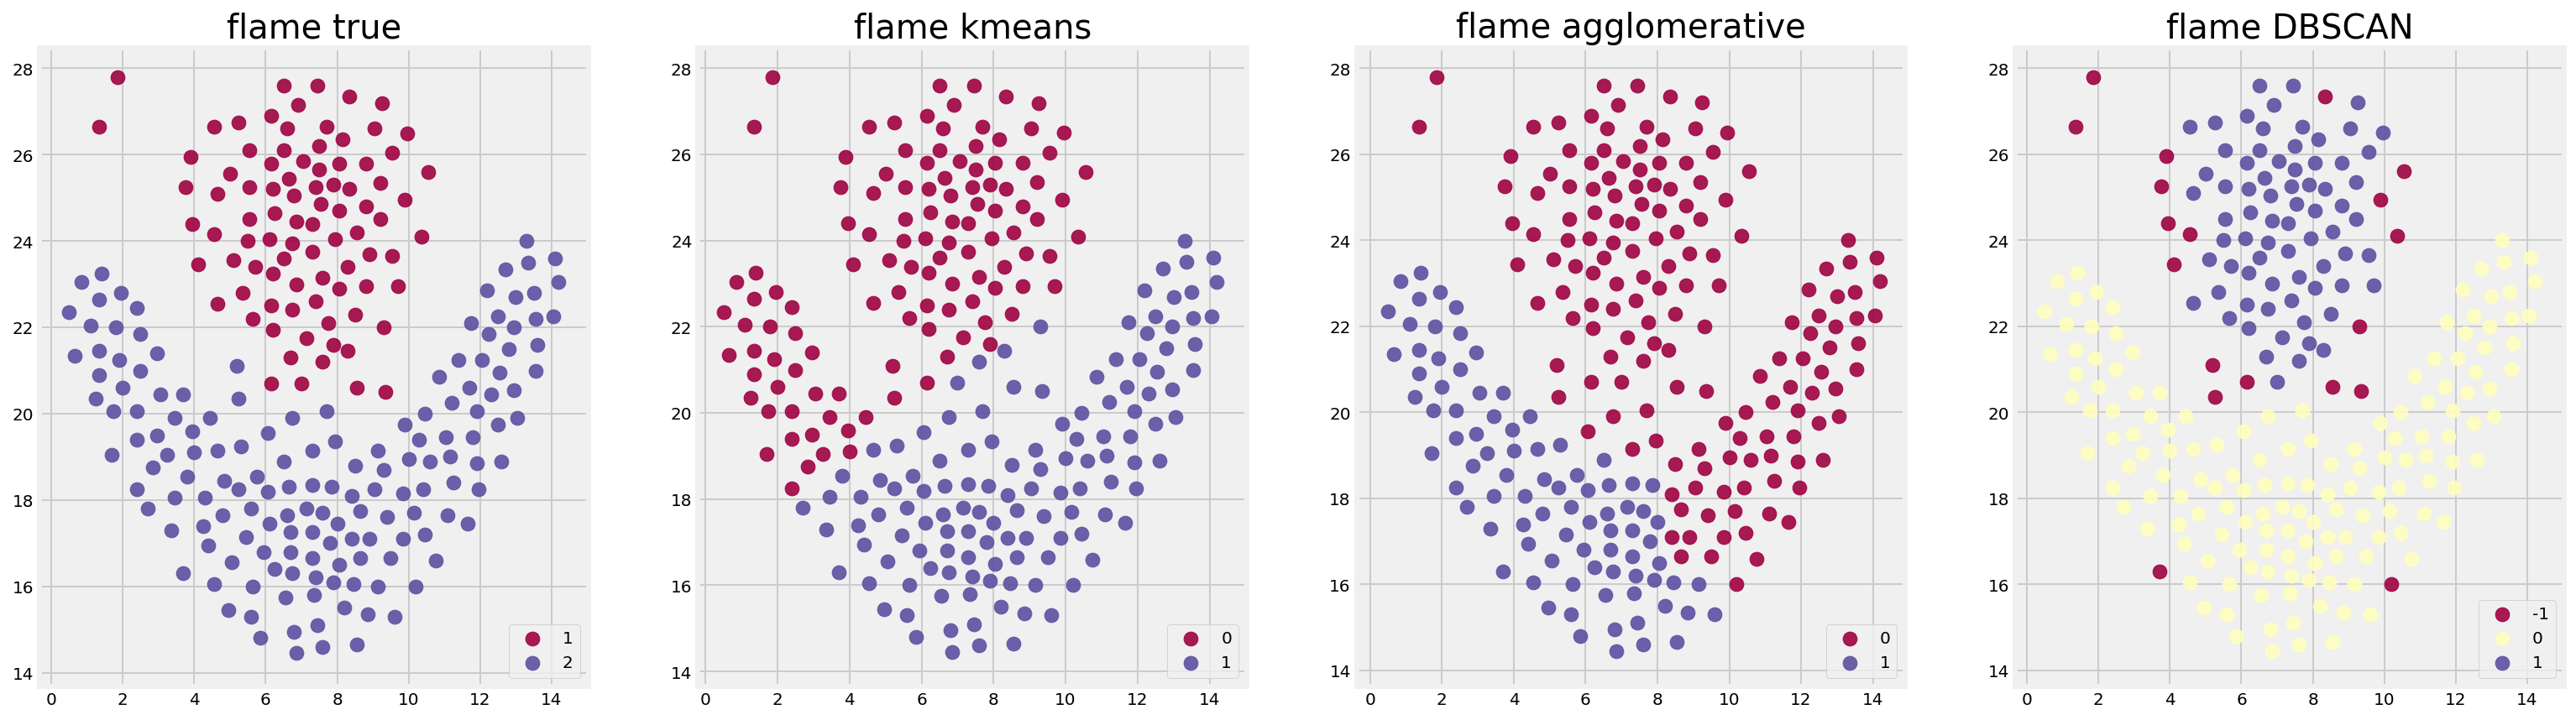

In [23]:
plotting (flame, 'flame', n_clusters_kmeans=2, n_clusters_agg=2,
                     dbscan_eps=0.8, dbscan_min_samples=3)

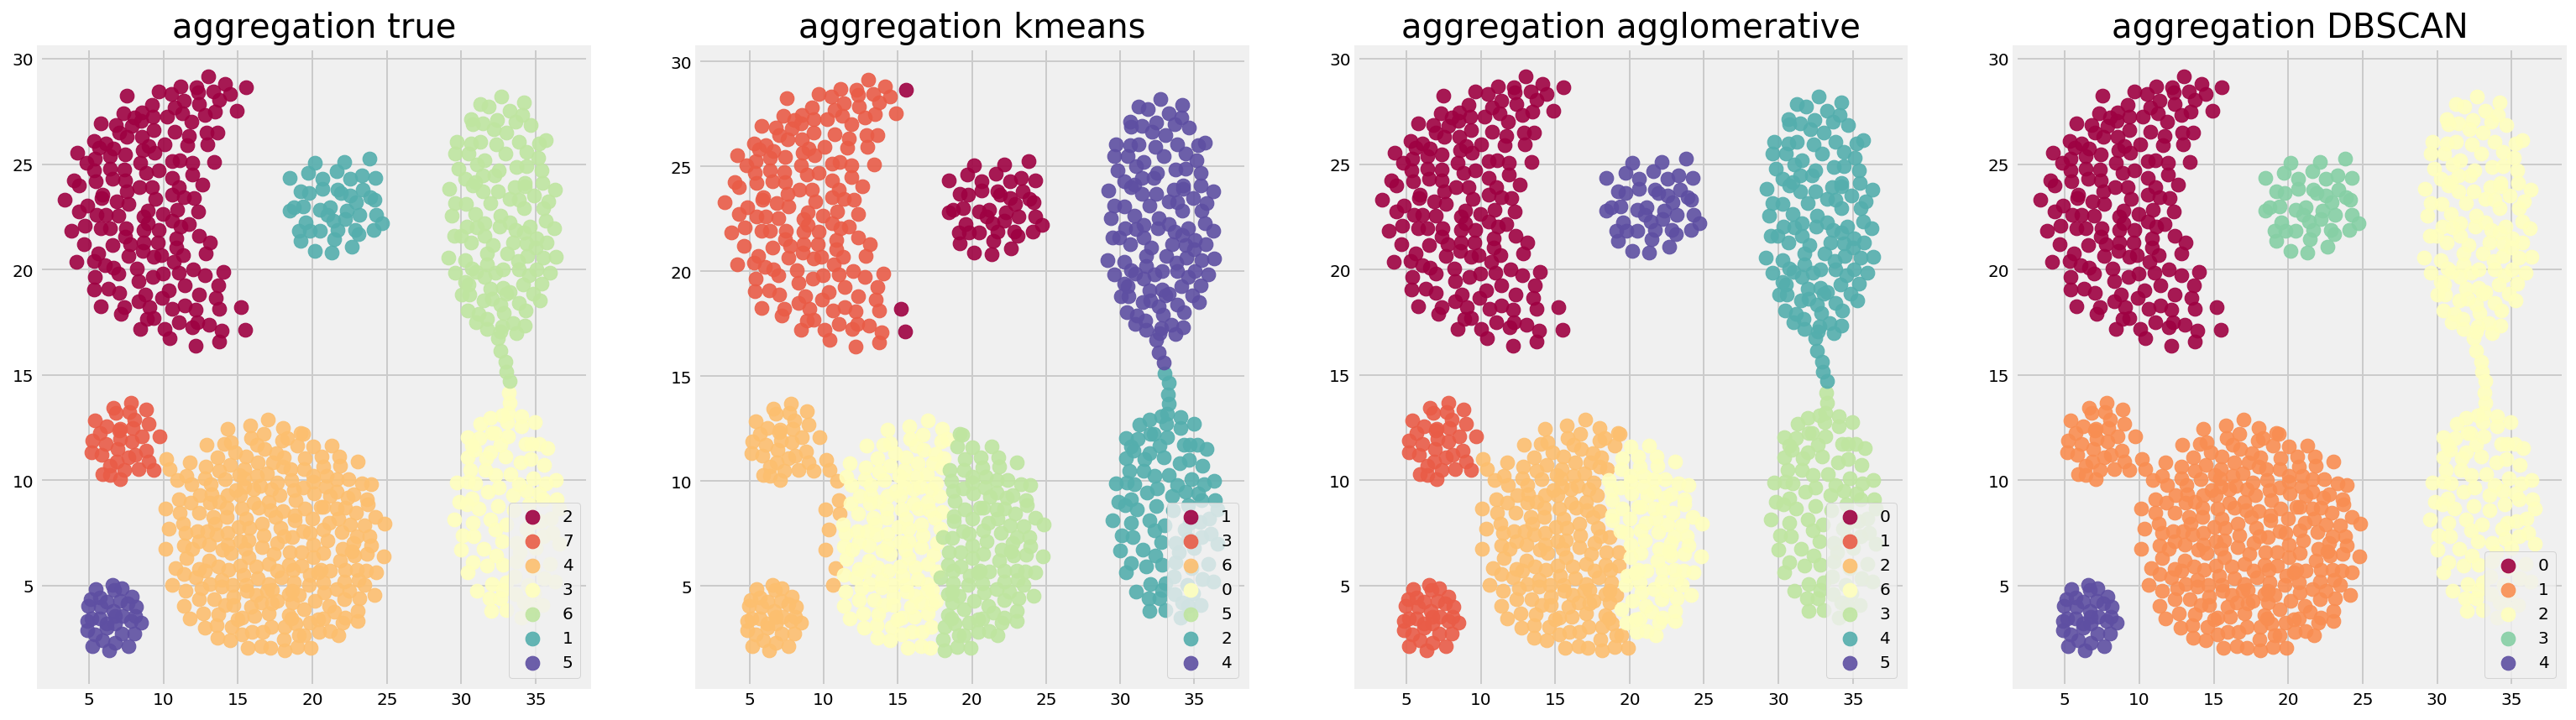

In [25]:
plotting(agg, 'aggregation', n_clusters_kmeans=7, n_clusters_agg=7,
                     dbscan_eps=2, dbscan_min_samples=5)


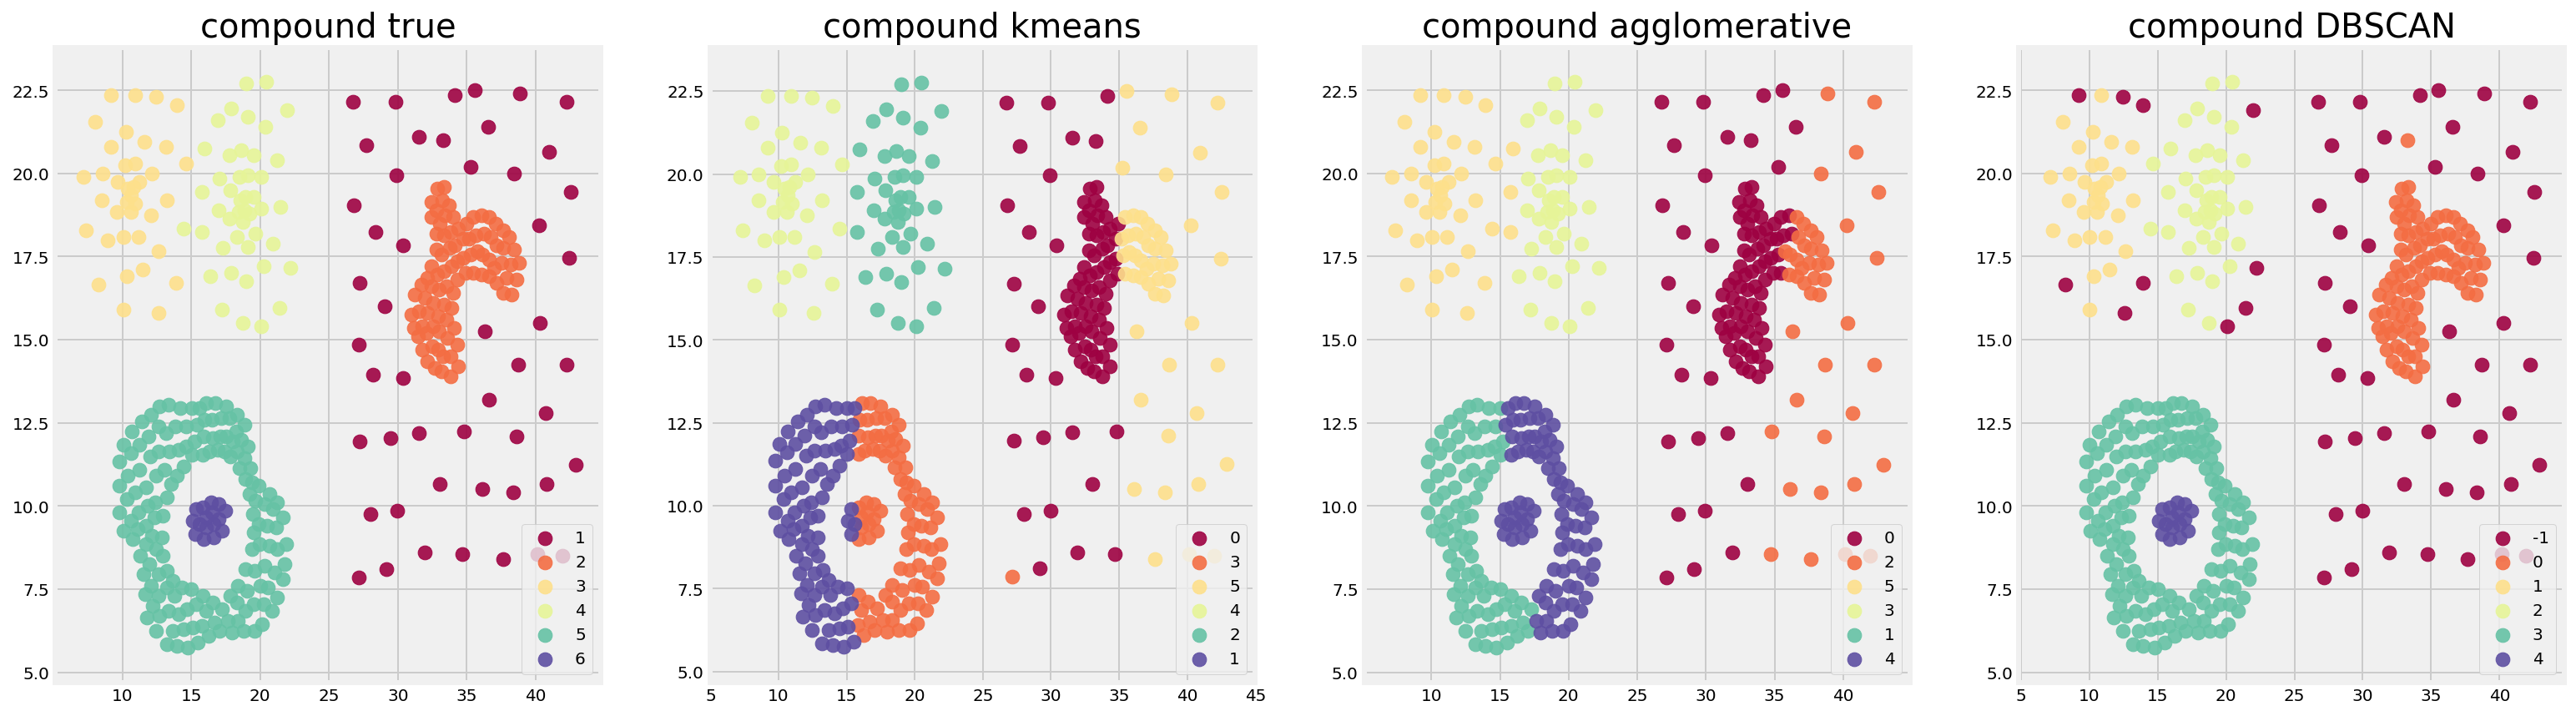

In [26]:
plotting(comp, 'compound', n_clusters_kmeans=6, n_clusters_agg=6,
                     dbscan_eps=1.5, dbscan_min_samples=4)


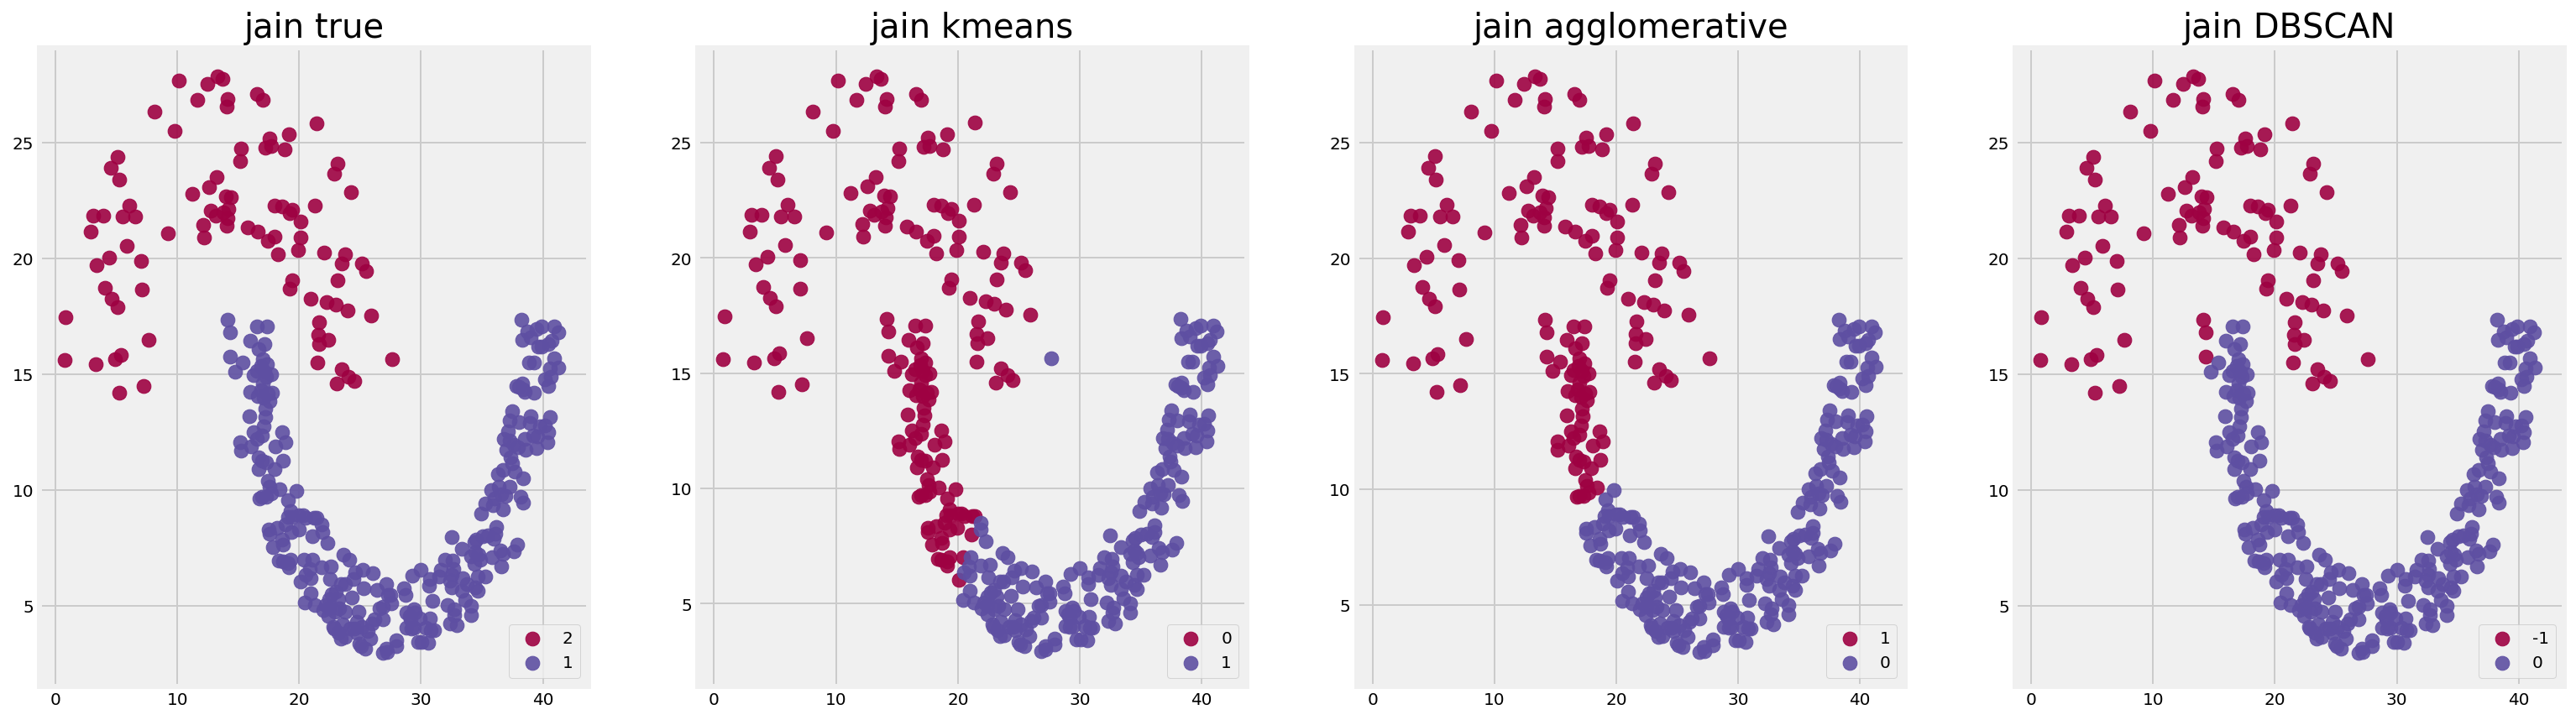

In [28]:
plotting(jain, 'jain', n_clusters_kmeans=2, n_clusters_agg=2,
                     dbscan_eps=1.7, dbscan_min_samples=13)

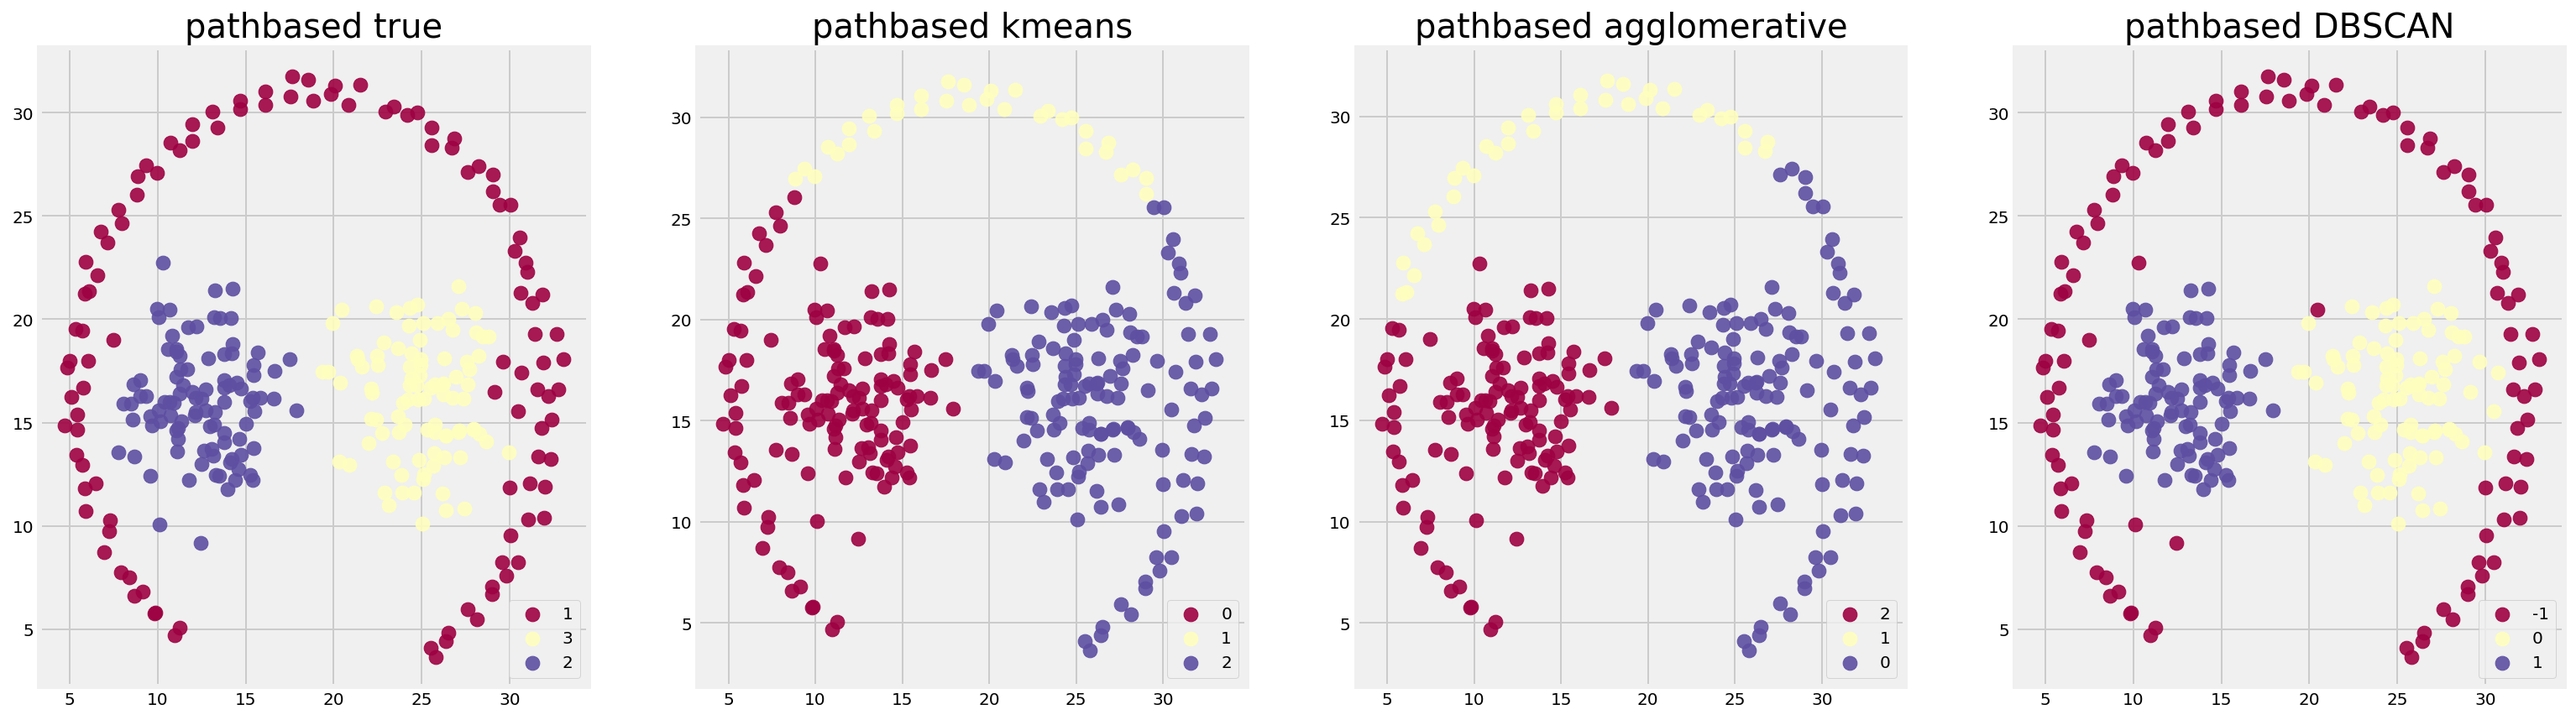

In [29]:
plotting(path, 'pathbased', n_clusters_kmeans=3, n_clusters_agg=3,
                     dbscan_eps=2.25, dbscan_min_samples=10)

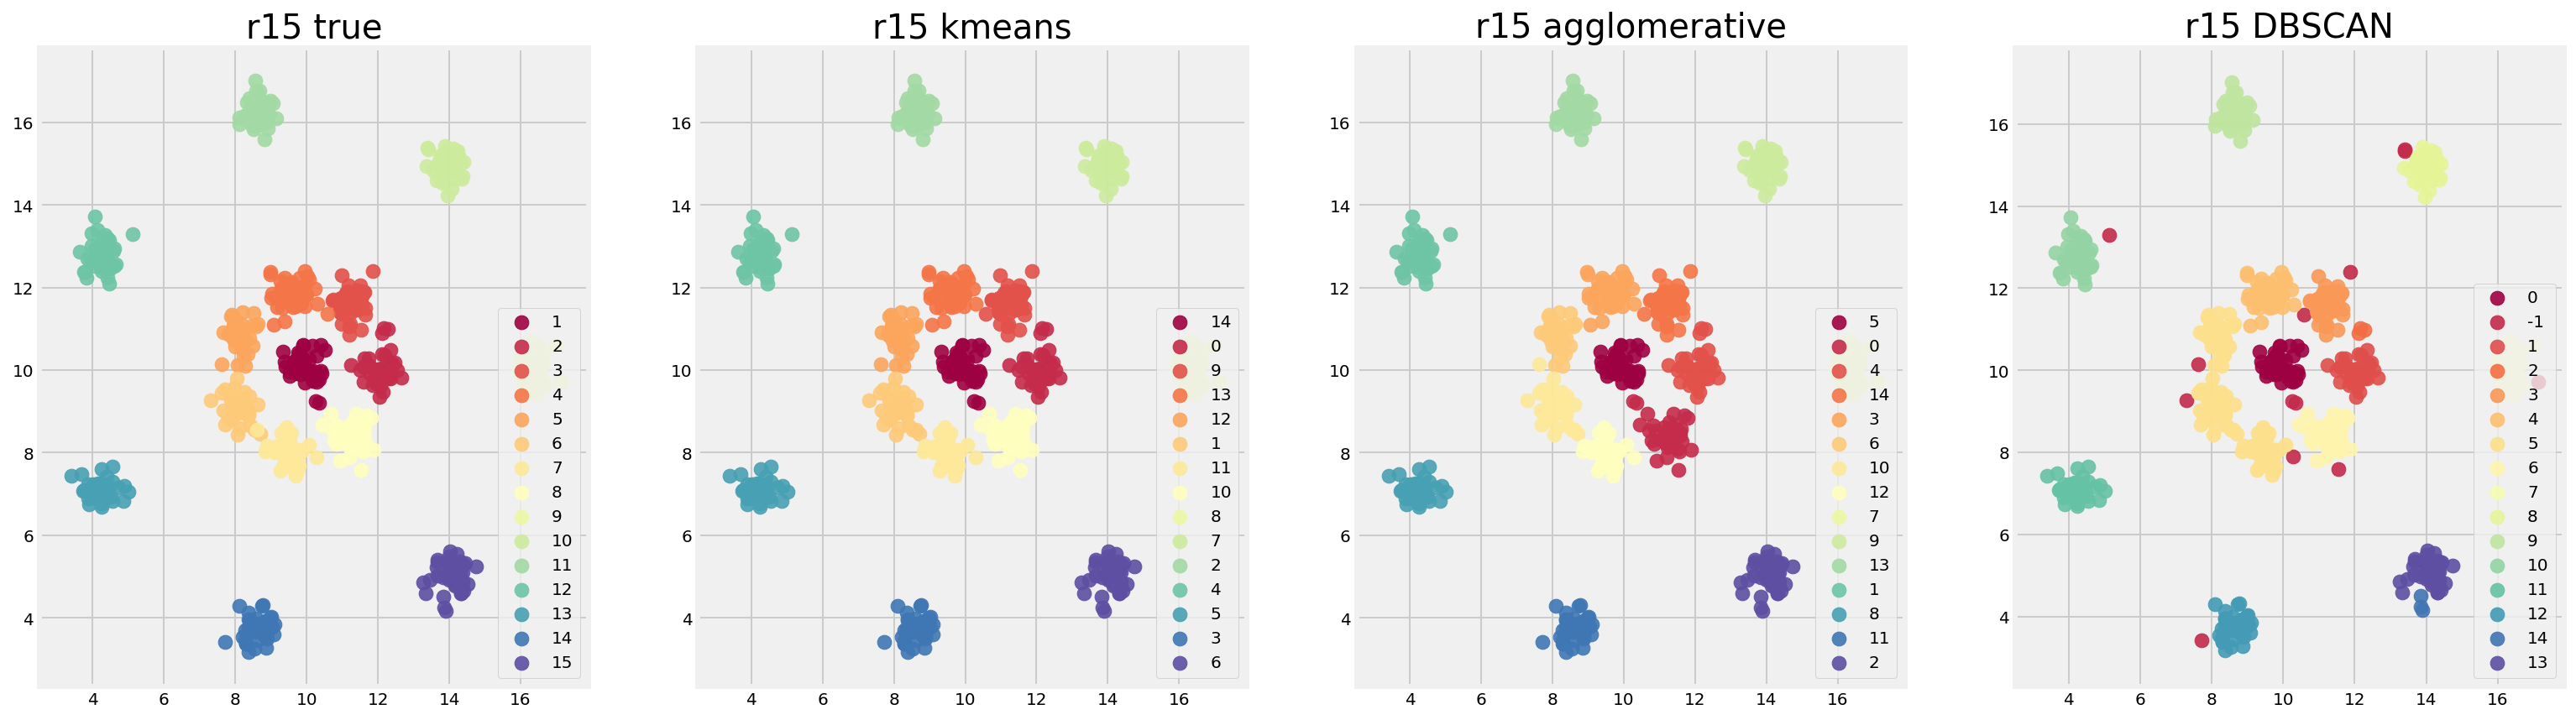

In [30]:
plotting(r15, 'r15', n_clusters_kmeans=15, n_clusters_agg=15,
                     dbscan_eps=0.35, dbscan_min_samples=3)

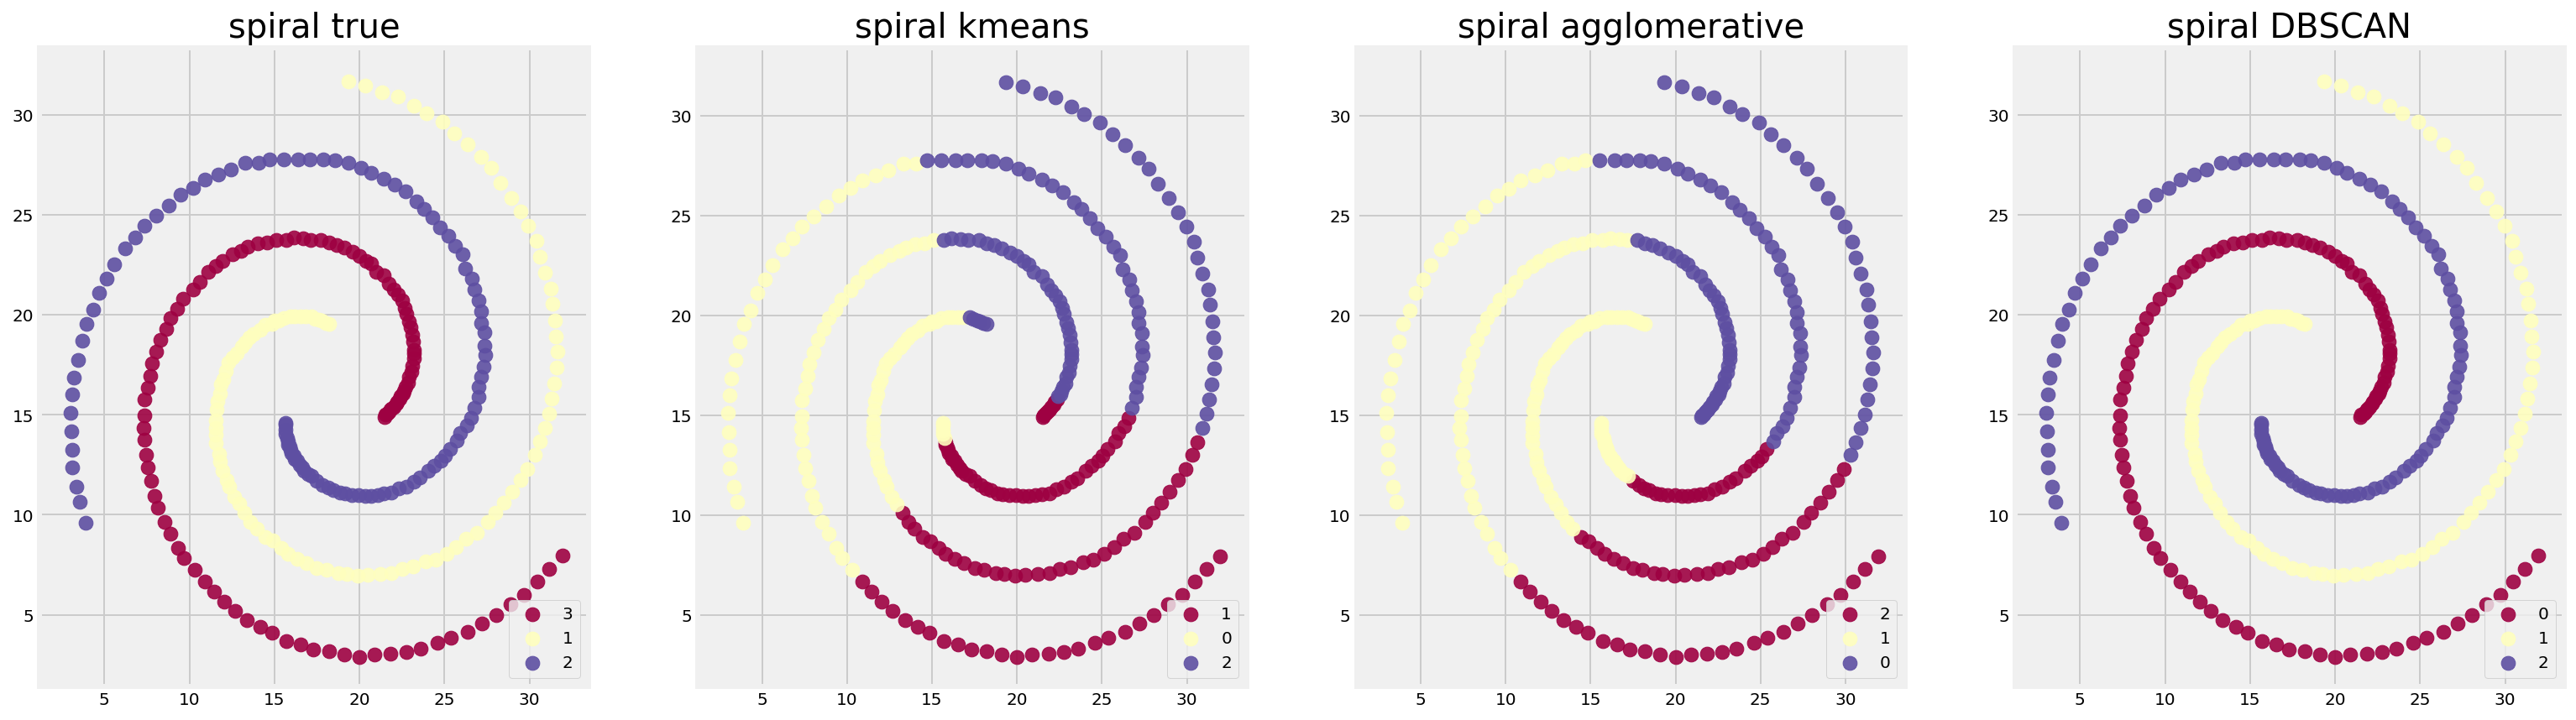

In [31]:
plotting(spiral, 'spiral', n_clusters_kmeans=3, n_clusters_agg=3,
                     dbscan_eps=3, dbscan_min_samples=5)